University of Michigan - ROB 101 Computational Linear Algebra

# Lab 8. Basis Vectors, Dimension, Coordinates, Eigenvectors and Eigenvalues

- Skills:
    - Introduction of basis vectors, dimension, and coordinates
    - Compute rank and nullspace of a matrix
    - Application of eigenvectors and eigenvalues

## Problem 1. Basis Vectors, Dimension, and Coordinates

### Basis Vectors and Dimension

Suppose that $V$ is a subspace of $\mathbb{R}^n$. Then $\{v_1, v_2, ..., v_k\}$ is a **basis for $V$** if
1. the set $\{v_1, v_2, ..., v_k\}$ is **linearly independent**, and
2. span$\{v_1, v_2, ..., v_k\} = V$.

The **dimension of $V$ is $k$**, the number of basis vectors.

Let's consider $\mathbb{R}^2$, $\{u=e_1, v=e_2\}$ are the natural basis vectors.

In [ ]:
using LinearAlgebra

# Function from Lab 6
# Determine independence using the determinant
function is_independent(A, atol=1e-10)
    det_A = det(A'*A)
    return !isapprox(det_A, 0.0, atol=atol)
end

# Check e1 an e2 are linearly independent
e1 = [0 1]'
e2 = [1 0]'
is_independent([e1 e2])

An important property of the set $\{e_1, e_2\} \subset \mathbb{R}^2$ is that any vector $x \in \mathbb{R}^2$ can be written as a **linear combination** of $\{e_1, e_2\}$. Indeed,
$$
x := \begin{bmatrix} x_1 \\ x_2 \end{bmatrix}
= x_1 \begin{bmatrix} 1 \\ 0 \end{bmatrix}
+ x_2 \begin{bmatrix} 0 \\ 1 \end{bmatrix}
= x_1 e_1 + x_2 e_2.
$$
Thus, span$\{e_1, e_2\} = \mathbb{R}^2$. Therefore, $\{u=e_1, v=e_2\}$ is a basis for $\mathbb{R}^2$.

### Vector Space Coordinates and Vector Representation

Suppose that $V$ is a $k$-dimensional subspace of $\mathbb{R}^n$ with basis $\{v_1, v_2, ..., v_k\}$ or all of $\mathbb{R}^n$ itself (in which case, $k=n$). Then each $x \in V$ can be expressed (uniquely) as a linear combination of basis vectors
$$x = a_1 v_1 + a_2 v_2 + ... + a_k v_k.$$
Stacking the coefficient $a_1, a_2, ..., a_k$ into a column vector yields
$$[x]_{\{v_1, ..., v_k\}} := \begin{bmatrix}
a_1 \\ a_2 \\ \vdots \\ a_k
\end{bmatrix},$$
which forms the **coordinates** of x associated to the basis $\{v_1, v_2, ..., v_k\}$.

For $\mathbb{R}^2$, $
x := 
\begin{bmatrix}
x_1 \\ x_2
\end{bmatrix}
= x_1 e_1 + x_2 e_2$, and therefore the coordinates of $x$ associated to the basis $\{e_1, e_2\}$ are simply $(x_1, x_2)$. With other bases, the concept of representing vectors can be more interesting. We start with cases that we can visualize.

In [ ]:
using Plots

# Function of ploting a 2-d vector v using basis vectors {v1, v2} in R^2
function plot_with_basis(v1, v2, v)
    t = LinRange(-4, 4, 10)
    t = collect(t)
    p1 = plot(t, 0.0.*t, framestyle=:origin, aspect_ratio=1, legend=false, color=:black, lw=3)
    p1 = plot!(0.0.*t, t, color=:black, lw=3)
    for k = -4:4
        X = k*v1[1] .+ t.*v2[1]
        Y = k*v1[2] .+ t.*v2[2]
        p1 = plot!(X, Y, color=:gray)
    end
    for k = -4:4
        X = k*v2[1] .+ t.*v1[1]
        Y = k*v2[2] .+ t.*v1[2]
        p1 = plot!(X, Y, color=:gray)
    end
    p1 = plot!([0,v1[1]], [0,v1[2]], arrow=true, color=:blue, lw=4)
    p1 = plot!([0,v2[1]], [0,v2[2]], arrow=true, color=:green, lw=4)
    p2 = plot(t, 0.0.*t, framestyle=:origin, aspect_ratio=1, legend=false, color=:black, lw=3)
    p2 = plot!(0.0.*t, t, color=:black, lw=3)
    for k = -4:4
        X = k*v1[1] .+ t.*v2[1]
        Y = k*v1[2] .+ t.*v2[2]
        p2 = plot!(X, Y, color=:gray)
    end
    for k = -4:4
        X = k*v2[1] .+ t.*v1[1]
        Y = k*v2[2] .+ t.*v1[2]
        p2 = plot!(X, Y, color=:gray)
    end
    pt = v[1]*v1 + v[2]*v2
    p2 = plot!([0, v[1]*v1[1]], [0, v[1]*v1[2]], color=:blue, lw=4)
    p2 = plot!([v[1]*v1[1], v[1]*v1[1]+v[2]*v2[1]], [v[1]*v1[2], v[1]*v1[2]+v[2]*v2[2]], color=:green, lw=4)
    p2 = scatter!([pt[1]], [pt[2]], color=:red)
    plot(p1, p2, layout=(1, 2))
end

In [ ]:
# We can plot the vector using the natural basis vectors
e1 = [1; 0]
e2 = [0; 1]
v = [3; 2]
plot_with_basis(e1, e2, v)

In [ ]:
# We can plot a vector v with a different set of basis vectors in R^2
v1 = [1; -0.2]
v2 = [0.2; 1]
v = [3; 2] # means v = 3 v1 + 2 v2
plot_with_basis(v1, v2, v)

In [ ]:
## Plot vector v with basis {v1 = e1, v2=2e2}
v = [3; 2]

# your code here
throw(ErrorException())

**We'll come back to higher dimesions after we visit Rank and Nullity**



## Problem 2. Rank

The **rank** of a matrix $A$ is the **dimension** of the vector space spanned by its columns

In Julia, we can use the rank() function to determine the dimension of the column span of a matrix. And, we can use Grahm-Schmidt to obtain a basis of its column span.

In [ ]:
# Function from Lab 7
# Grahm-Schmidt that allows linearly dependent vectors
function grahm_schmidt2(U,aTol=1e-8)
    # start a blank matrix V which will hold all of the output vectors
    (rows, cols) = size(U)
    V = Array{Float64,2}(undef, rows, 0)
    #start a for loop that runs the number of times that there are columns in U
    for k in 1:cols
        vk = U[:, k] 
        for i in 1:size(V,2)
            vk = vk - ( dot(U[:,k], V[:,i])/dot(V[:,i], V[:,i]) )*V[:,i]
        end
        if norm(vk) > aTol  # Trick? Not really. We only add a normalized vk 
           V = [V vk/norm(vk)]   # if vk is not approximately the zero vector. Make sense?
        end  # And we ignore the vector if it is dependent on the previous vectors
    end
    return V
end

In [ ]:
# Given a matrix A
A = [1 1 0 2; -1 -1 0 -2]

# The dimension of the column span of A is its rank
@show dim = rank(A)

# Using Grahm-Schmidt to obtain a basis
@show V = grahm_schmidt2(A)

# Illustrating that indeed, each column of A is a linear combination of the basis provided by Gram-Schmidt
v=V[:,1]
for i = 1:size(A,2)
    Ai=A[:,i]
    # Solve v * c = Ai, which is a Tall equation
    c=inv(v'*v)*v'*Ai
    @show c
    @show norm(Ai-c*v)
end

**An Exercise for You**

In [ ]:
# Given a set of vectors
v1 = [1 0 -1]'
v2 = [-2 1 1]'
v3 = [3 -1 -2]'
v4 = [1 0 -1]'

# Compute the dimension of the span of the vectors (dim = ) and compute a basis for their span (basis = )
# dim = 
# basis = 
# your code here
throw(ErrorException())

In [ ]:
# Friendly self test
T1=@assert rank([v1 v2 v3 v4]) == rank([v1 v2 v3 v4 basis])
T2=@assert norm(basis'*basis-I) < 1e-6
println("all nothings means likely correct")
[T1 T2]

In [ ]:
# Change the order of the columns of A and show that you get a different basis; call it basis2
#
# basis2=
# your code here
throw(ErrorException())

In [ ]:
# Friendly self test
T1=@assert rank([v1 v2 v3 v4]) == rank(basis2)
T2=@assert norm(basis'*basis2-I) > 1e-2
println("all nothings means likely correct")
[T1 T2]

## Problem 3. When a Basis is Orthonormal, Expressing a Vector as a Linear Combination of the Basis Vectors is Very Easy

Suppose that $\{ v_1, v_2, \ldots, v_k \} $ ia a basis for a $k$-dimensional subspace $V \subset \mathbb{R}^n$. Then 
$$v \in V \iff v = a_1 v_1 + a_2 v_2 + \cdots + a_k v_k \iff v = \left[ \begin{array}{cccc}v_1 & v_2 & \cdots & v_k \end{array} \right] \left[ \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_k \end{array} \right]$$
for some real numbers $a_1, a_2, \ldots, a_k$. Hence, if $v \in V$, we can compute the coefficients by solving the equation $A a = v$ where
$$ A=\left[ \begin{array}{cccc}v_1 & v_2 & \cdots & v_k \end{array} \right] \text{ and } a= \left[ \begin{array}{c} a_1 \\ a_2 \\ \vdots \\ a_k \end{array} \right].$$
In Lab7, we treated the solution of tall equations (more rows than columns). 

When the basis is orthonormal, we note that $A$ satisfies $A^\top \cdot A = I_k$. Hence, we can solve the equation by usage of the matrix transpose
$$ A a = v \iff A^\top \cdot A a = A^\top v  \iff a = A^\top v.$$

**Remark:** Is is important that $v \in {\rm col~span}(A),$ because, otherwise, $A a = v$ does NOT have a solution.


In [ ]:
# Generate a set of orthonormal vectors
using Random
Random.seed!(876543212345678)
M = randn(5, 4)
v1 = grahm_schmidt2(M)[:,1]
v2 = grahm_schmidt2(M)[:,2]
v3 = grahm_schmidt2(M)[:,3]
v4 = grahm_schmidt2(M)[:,4]

# Generate a vector v in the column span
c = randn(4,1)
v = M*c

# Express the vector v as a linear combination of the basis vetors {v1, v2, v3, v4}
# Compute the coefficient vector a = [a1, a2, a3, a4] for the given basis (a = ?)
# your code here
throw(ErrorException())

In [ ]:
# Friendly self test
T1 = @assert isapprox([v1 v2 v3 v4]*a, v)
println("all nothings means likely correct")
[T1]

## Problem 4. Null Space

Find a basis for a two-dimensional subspace of $\mathbb{R}^4$ defined by
$$ V := \{ x = \begin{bmatrix}
x_1 \\ x_2 \\ x_3 \\ x_4
\end{bmatrix} \in \mathbb{R}^4 | x_1 + x_3 = 0, \text{and } x_2 - x_4 = 0\}.$$

The subspace can be defined by all the $x \in \mathbb{R}^4$ satisfying $Ax = 0$, where $A = \begin{bmatrix} 1 & 0 & 1 & 0 \\ 0 & 1 & 0 & -1\end{bmatrix}$, which is the **null space** of matrix $A$. In Julia, we can use nullspace() to get the basis of its nullspace.

In [ ]:
# Write the matrix A accroding to the equations and compute its null space
A = [1 0 1 0; 0 1 0 -1]
V = nullspace(A)

Find a basis for the subspace of $\mathbb{R}^3$ defined by
$$V:= \{ (x, y, z) | z = 2x + y\}.$$

In [ ]:
# Plot this plane
z(x, y) = 2x+y
x = -5:5
y = -5:5
plot(x, y, z, st=:surface)

**An Exercise for You**

In [ ]:
# Find a basis for the defined subspace (V =)
# your code here
throw(ErrorException())

In [ ]:
# Friendly self test
T1 = @assert isapprox(A*V, [0 0])
println("all nothings means likely correct")
[T1]

## Probelm 5. Eigenvectors and Eigenvalues

We use the eigen() command/function in Julia to compute eigenvalues and eigenvectors of a matrix.

In [ ]:
using Random
Random.seed!(876543212345678)

# Symmetric matrices have real eigenvalues
A = randn(4, 4)
A = A'*A

# Compute eigenvalues and eigenvectors
E = eigen(A)
@show E.values
E.vectors

Given a discrete dynamic system $x_{k+1} = A x_k$, where $A$ is defined above. Let's see what will happen for different $x_0$.

In [ ]:
# When x0 equals the eigenvector v1, we can observe norm(xk) goes to 0
x = E.vectors[:,1]
p = scatter([0], [norm(x)], legend=false)
for k = 1:10
    x = A*x 
    # Remark xk = A^k * x0, where x0 = E.vectors[:,1]
    p = scatter!([k], [norm(x)])
end
plot(p)

In [ ]:
# When x0 equals the eigenvector v3, we can observe norm(xk) goes to infinity
x = E.vectors[:,3]
p = scatter([0], [norm(x)], legend=false)
for k = 1:10
    x = A*x
    # Remark xk = A^k * x0, where x0 = E.vectors[:,3]
    p = scatter!([k], [norm(x)])
end
plot(p)

In [ ]:
# What will happen when x0 = 2v1+3v3?
x = 2*E.vectors[:,1] + 3*E.vectors[:,3]
p = scatter([0], [norm(x)], legend=false)
for k = 1:10
    x = A*x
    # Remark xk = A^k * x0, where x0 = 2*E.vectors[:,1] + 3*E.vectors[:,3]
    p = scatter!([k], [norm(x)])
end
plot(p)

From these observations, we can see when $x_0 = v_1$, where $v_1$ is the corresponding eigenvector of eigenvalue $\lambda_1$, we have $x_1 = A x_0 = A v_1 = \lambda_1 v_1$. Therefore, when $|\lambda_1| < 1$, $\Vert x_{k+1} \Vert \rightarrow 0$; When $x_0 = v_3$, where $|\lambda_3| > 1$, $\Vert x_{k+1} \Vert \rightarrow \infty$.

### Discussion Question, for what $x_0$ does $x_k$ stay bounded in the above example? Hint, the set is a subspace of $R^4$.

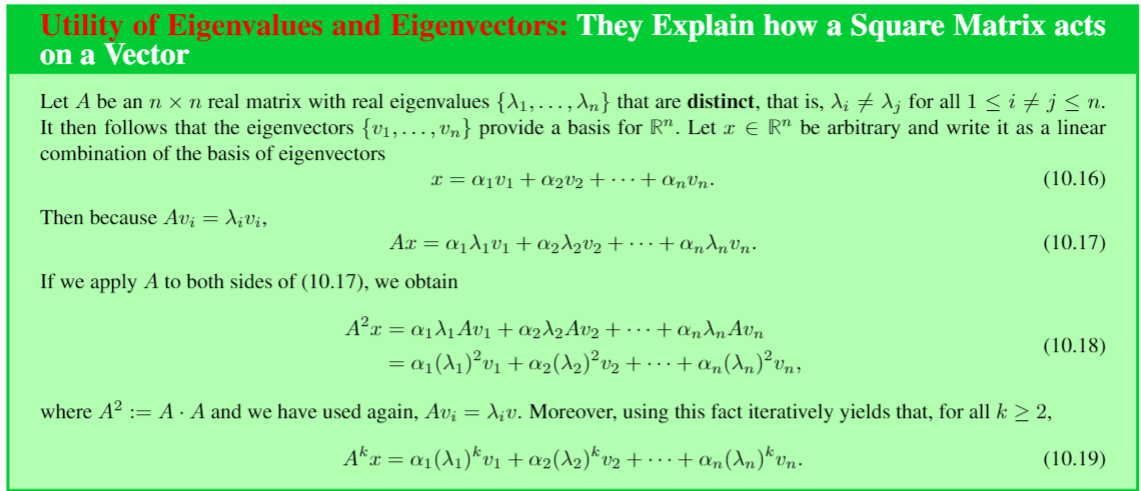

**To work on at home** For what initial conditions $x_0$ does $x_k$ stay bounded for
$$ x_{k+1} = A x_k $$
where $A$ is defined below? **Hint: the set is a subspace.** You are asked to give a basis for it in the form

v1=

v2=

In [ ]:
using Random
Random.seed!(8765432123456)

# Symmetric matrices have real eigenvalues
A = randn(4, 4)
A = A+A'

# Compute eigenvalues and eigenvectors
E = eigen(A)
@show E.values
E.vectors

In [ ]:
# Solution here
#v1 =
#v2 = 
# your code here
throw(ErrorException())

In [ ]:
# Friendly self test
N=[ 0.266214   0.522454
 0.699307  -0.671167
 0.532852   0.2989
 0.395183   0.432707]
T1 = @assert isapprox([v1 v2]'*N, zeros(2,2),atol=1e-4)
println("all nothings means likely correct")
[T1]